---

__演算法期中第二次機考 (2024/11/26)__

---

__1. 無向圖 (10 pts)__

(a) 給定一**無向圖**的相鄰矩陣 (adjacency matrix)，設計一自訂函式 edge_count()，其輸入為給定的相鄰矩陣，輸出為計算此圖所有邊的個數。 (5 pts)

(b) 給定一**無向圖**的相鄰矩陣 (adjacency matrix)，若節點的索引從 0 開始，設計一自訂函式 degree()，其輸入依序為給定的相鄰矩陣與對應查詢節點的索引，而輸出為計算此圖對應查詢索引節點的 degree 值。 (5 pts)

In [1]:
def edge_count(mat):
    n = len(mat)
    count = 0
    for i in range(n):
        for j in range(i + 1,n):
            if mat[i][j] == 1:
                count +=1
    return count

def degree(mat, idx):
    n = len(mat)
    degree = 0
    for i in range(n):
        if mat[idx][i] == 1:
            degree += 1
    return degree

In [2]:
# 測試區

A = [[0,1,0,0,0,1,0],
     [1,0,1,0,0,0,1],
     [0,1,0,1,0,0,0],
     [0,0,1,0,1,0,1],
     [0,0,0,1,0,1,1],
     [1,0,0,0,1,0,0],
     [0,1,0,1,1,0,0]]

print(edge_count(A))
print(degree(A,4), degree(A,5), degree(A,6))

9
3 2 3


__2. 有向圖 (15 pts)__

(a) 給定一**有向圖**的相鄰矩陣 (adjacency matrix)，設計一自訂函式 direct_edge_count()，其輸入為給定的相鄰矩陣，輸出為計算此圖所有邊的個數。 (5 pts)

(b) 給定一**有向圖**的相鄰矩陣 (adjacency matrix)，若節點的索引從0開始，**分別設計兩個**自訂函式 in_degree() 與 out_degree()，其輸入依序為給定的相鄰矩陣與對應查詢節點的索引，而輸出為計算此圖對應查詢索引節點的 in-degree值及 out-degree值。 (10 pts)

In [3]:
def direct_edge_count(mat):
    n = len(mat)
    count = 0
    for i in range(n):
        for j in range(n):
            if mat[i][j] == 1:
                count +=1
    return count

def in_degree(mat, idx):
    n = len(mat)
    degree = 0
    for i in range(n):
        if mat[i][idx] == 1:
            degree += 1
    return degree

def out_degree(mat, idx):
    n = len(mat)
    degree = 0
    for i in range(n):
        if mat[idx][i] == 1:
            degree += 1
    return degree

In [4]:
# 測試區

B = [[0,1,0,0,1],
     [0,0,1,1,0],
     [0,1,0,1,0],
     [1,0,0,0,1],
     [0,1,0,1,0]]

print(direct_edge_count(B))
print(in_degree(B,1), in_degree(B,4), out_degree(B,0))

10
3 2 2


__3. BFS (10 pts)__

給定一**無向圖**的相鄰矩陣 (adjacency matrix)，若節點的索引從0開始，設計一自訂函式 BFS()，其輸入依序為給定的相鄰矩陣與起始節點的索引，並在程式中輸出(print()) traversal 的節點索引順序(中間以空格區隔)。

__請注意，在同一個父節點下請依照節點索引由小至大的順序來挑選走訪順序__


In [5]:
def BFS(mat,v=0):   # Breadth First Search
    n = len(mat)
    Queue = [v]
    Visited = [0] * n
    while sum(Visited) < n:
        v = Queue.pop(0)
        if Visited[v] == 0:
            print(v, end=" ")
            Visited[v] = 1
            for k in range(n):
                if mat[v][k] == 1 and Visited[k] == 0:
                    Queue.append(k)

In [6]:
# 測試區

A = [[0,1,0,0,0,1,0],
     [1,0,1,0,0,0,1],
     [0,1,0,1,0,0,0],
     [0,0,1,0,1,0,1],
     [0,0,0,1,0,1,1],
     [1,0,0,0,1,0,0],
     [0,1,0,1,1,0,0]]

BFS(A)

0 1 5 2 6 4 3 

__4. DFS + Spanning Tree (15 pts)__

給定一**無向圖**的相鄰矩陣 (adjacency matrix)，若節點的索引從0開始，設計一自訂函式 DFS_ST()，其輸入依序為給定的相鄰矩陣與起始節點的索引，輸出為其深度優先走訪生成的展開樹(spanning tree)所對應的相鄰矩陣。

__請注意，在同一個父節點下請依照節點索引由小至大的順序來挑選走訪順序__

In [7]:
def DFS_ST(mat, v=0):   # Depth First Search Spanning Tree
    n = len(mat)
    ST = [[0 for j in range(n)] for i in range(n)]
    Stack = [v]
    Visited = [0] * n

    while sum(Visited) < n:
        v = Stack[-1]
        if Visited[v] == 0:
            print(v, end=' ')
            Visited[v] = 1
            if len(Stack) > 1:
                ST[Stack[-2]][Stack[-1]] = 1
                ST[Stack[-1]][Stack[-2]] = 1

        go_deeper = False
        for k in range(n):
            if mat[v][k] == 1 and Visited[k] == 0:
                Stack.append(k)
                go_deeper = True
                break

        if go_deeper == False:
            Stack.pop()

    print('')
    return ST

In [8]:
# 測試區

A = [[0,1,0,0,0,1,0],
     [1,0,1,0,0,0,1],
     [0,1,0,1,0,0,0],
     [0,0,1,0,1,0,1],
     [0,0,0,1,0,1,1],
     [1,0,0,0,1,0,0],
     [0,1,0,1,1,0,0]]

ST = DFS_ST(A,0)
for i in range(len(ST)):
     print(ST[i])

0 1 2 3 4 5 6 
[0, 1, 0, 0, 0, 0, 0]
[1, 0, 1, 0, 0, 0, 0]
[0, 1, 0, 1, 0, 0, 0]
[0, 0, 1, 0, 1, 0, 0]
[0, 0, 0, 1, 0, 1, 1]
[0, 0, 0, 0, 1, 0, 0]
[0, 0, 0, 0, 1, 0, 0]


__5. Cycle Check (10 pts)__

給定一**無向圖**的相鄰矩陣 (adjacency matrix)，若節點的索引從0開始，設計一自訂函式 cycle_check()，其輸入依序為給定的相鄰矩陣，其輸出為 **True** (此圖中有cycle) 或 **False** (此圖中無一cycle)。

In [9]:
def union_find(edge, P):   # to detect a cycle in the graph
    v1, v2 = edge[0], edge[1]
    cycle_exists = False

    if P[v1] == -1 and P[v2] == -1:
        # 都未指定（未有相連的點）
        P[v1] = v1       # v1 自己當 root
        P[v2] = v1       # v2 的 root 指向 v1

    elif P[v1] == -1:
        # 只有 v1 未指定（未有相連的點）
        P[v1] = P[v2]

    elif P[v2] == -1:
        # 只有 v2 未指定（未有相連的點）
        P[v2] = P[v1]

    else:
        # 兩點都有各自相連的點 → 找 root
        while P[v1] != v1:
            v1 = P[v1]
        while P[v2] != v2:
            v2 = P[v2]

        if P[v1] == P[v2]:
            # 兩邊 root 相同 → 成環
            cycle_exists = True
        else:
            # 不成環 → union
            P[v2] = v1   # 或 P[v1] = v2 亦可

    return cycle_exists

In [10]:
def cycle_check(mat):
    n = len(mat)
    P = [-1] * n   # parent 陣列初始化

    # 只看上三角（避免重複計算無向邊）
    for i in range(n):
        for j in range(i + 1, n):
            if mat[i][j] == 1:
                edge = (i, j)
                if union_find(edge, P):
                    return True   # 發現 cycle 立即返回

    return False   # 若檢查完所有邊仍無 cycle

In [11]:
# 測試區

A = [[0,1,0,0,0,1,0],
     [1,0,1,0,0,0,1],
     [0,1,0,1,0,0,0],
     [0,0,1,0,1,0,1],
     [0,0,0,1,0,1,1],
     [1,0,0,0,1,0,0],
     [0,1,0,1,1,0,0]]

if(cycle_check(A)):
    print('Cycle exists.')
else:
    print('No cycle')

ST = [[0,1,0,0,0,0,0],
      [1,0,1,0,0,0,0],
      [0,1,0,1,0,0,0],
      [0,0,1,0,1,0,0],
      [0,0,0,1,0,1,1],
      [0,0,0,0,1,0,0],
      [0,0,0,0,1,0,0]]

if(cycle_check(ST)):
    print('Cycle exists.')
else:
    print('No cycle')

Cycle exists.
No cycle


__6. Path Optimization (20 pts)__

給定一**有向圖**的成本矩陣(cost matrix, CM)，成本矩陣中的CM[i,j]為Vi到Vj的成本，若Vi至Vj無法直接到達，則成本為無窮大(或設置一個大數值常數代表無窮大)，且成本可以為**負值**。若節點的索引從0開始，設計一自訂函式 optimal_cost()，其輸入依序為給定的成本矩陣、起始節點索引、終點節點索引，其輸出為起始節點至終點節點的最小成本。

In [ ]:
def optimal_cost(CM,V0,V1):
    n = len(CM)
    A = [[ 0 for b in range(n)] for a in range(n)]















    return A[V0][V1]

In [ ]:
# 測試區

x = float('inf')
CM1 = [[ 0, 4, 11 ],
       [ 6, 0, 2 ],
       [ 3, x, 0 ]]

cost = optimal_cost(CM1,0,2)
print(cost)

CM2 = [[0,6,5,5,x,x,x],
       [x,0,x,x,-1,x,x],
       [x,-2,0,x,1,x,x],
       [x,x,-2,0,x,-1,x],
       [x,x,x,x,0,x,3],
       [x,x,x,x,x,0,3],
       [x,x,x,x,x,x,x,0]]
cost2 = optimal_cost(CM2,0,4)
print(cost2)

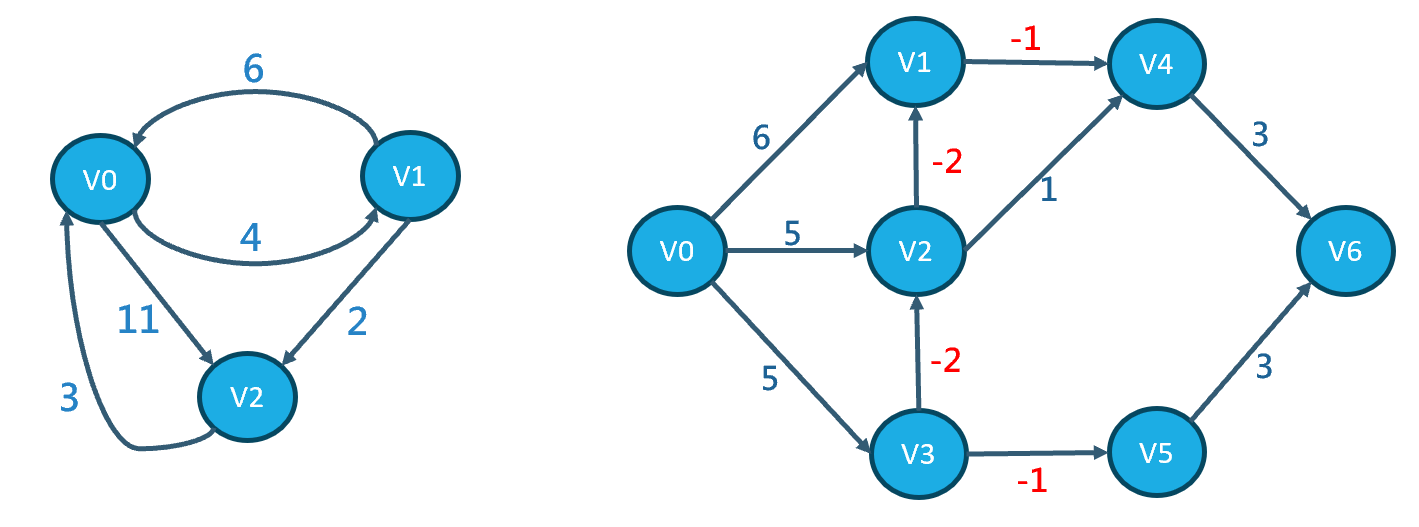

__7. Selection Sort (5 pts)__

實作 selection sort 演算法對序列中的數值進行**由大至小**的排序。設計一自訂函式 S_sort()，其輸入為一維序列(array or list)，其輸出為**由大至小**排序後之序列(array or list)。

__注意:原始的輸入序列其順序再函式呼叫前後不變__

In [ ]:
def S_sort(inp):
    L = inp.copy()








    return L

In [ ]:
# 測試區

L1 = [ 45, 82, 66, 92, 72, 88, 52, 58, 23, 32]
L2 = S_sort(L1)
print(L1)
print(L2)

__8. Quick Sort (15 pts)__

在 quick sort **由小至大**排序的演算法中，很重要的一步是選擇每一輪分組與比較的基數 pivot，若我們簡單地以每一輪輸入序列中的第一個值選為pivot，再將該輪輸入序列其他的數分為左右兩邊以進行排序(順序為先左再右)。請設計一自訂函式 Qsort_pivot()，其輸入為一維序列(array or list)，其輸出為**由小至大**排序後之序列(array or list)，並在過程中按照順序 print()(cout) 輸出每輪所選出的pivot值(請以空格區隔)。


In [ ]:
def Qsort_pivot(L):


















In [ ]:
# 測試區

L1 = [ 45, 82, 66, 92, 72, 88, 52, 58, 23, 32]
L2 = Qsort_pivot(L1)
print('')
print(L1)
print(L2)